# Image Classification

In [1]:
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import seaborn as sns

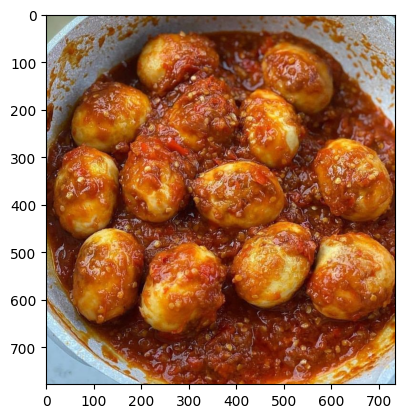

In [2]:
# Read Images
img = mpimg.imread('Dataset/Train/egg ballado/4c2cd42040c108f95bb2484ee0b00590.jpg')

# Output Images
plt.imshow(img)

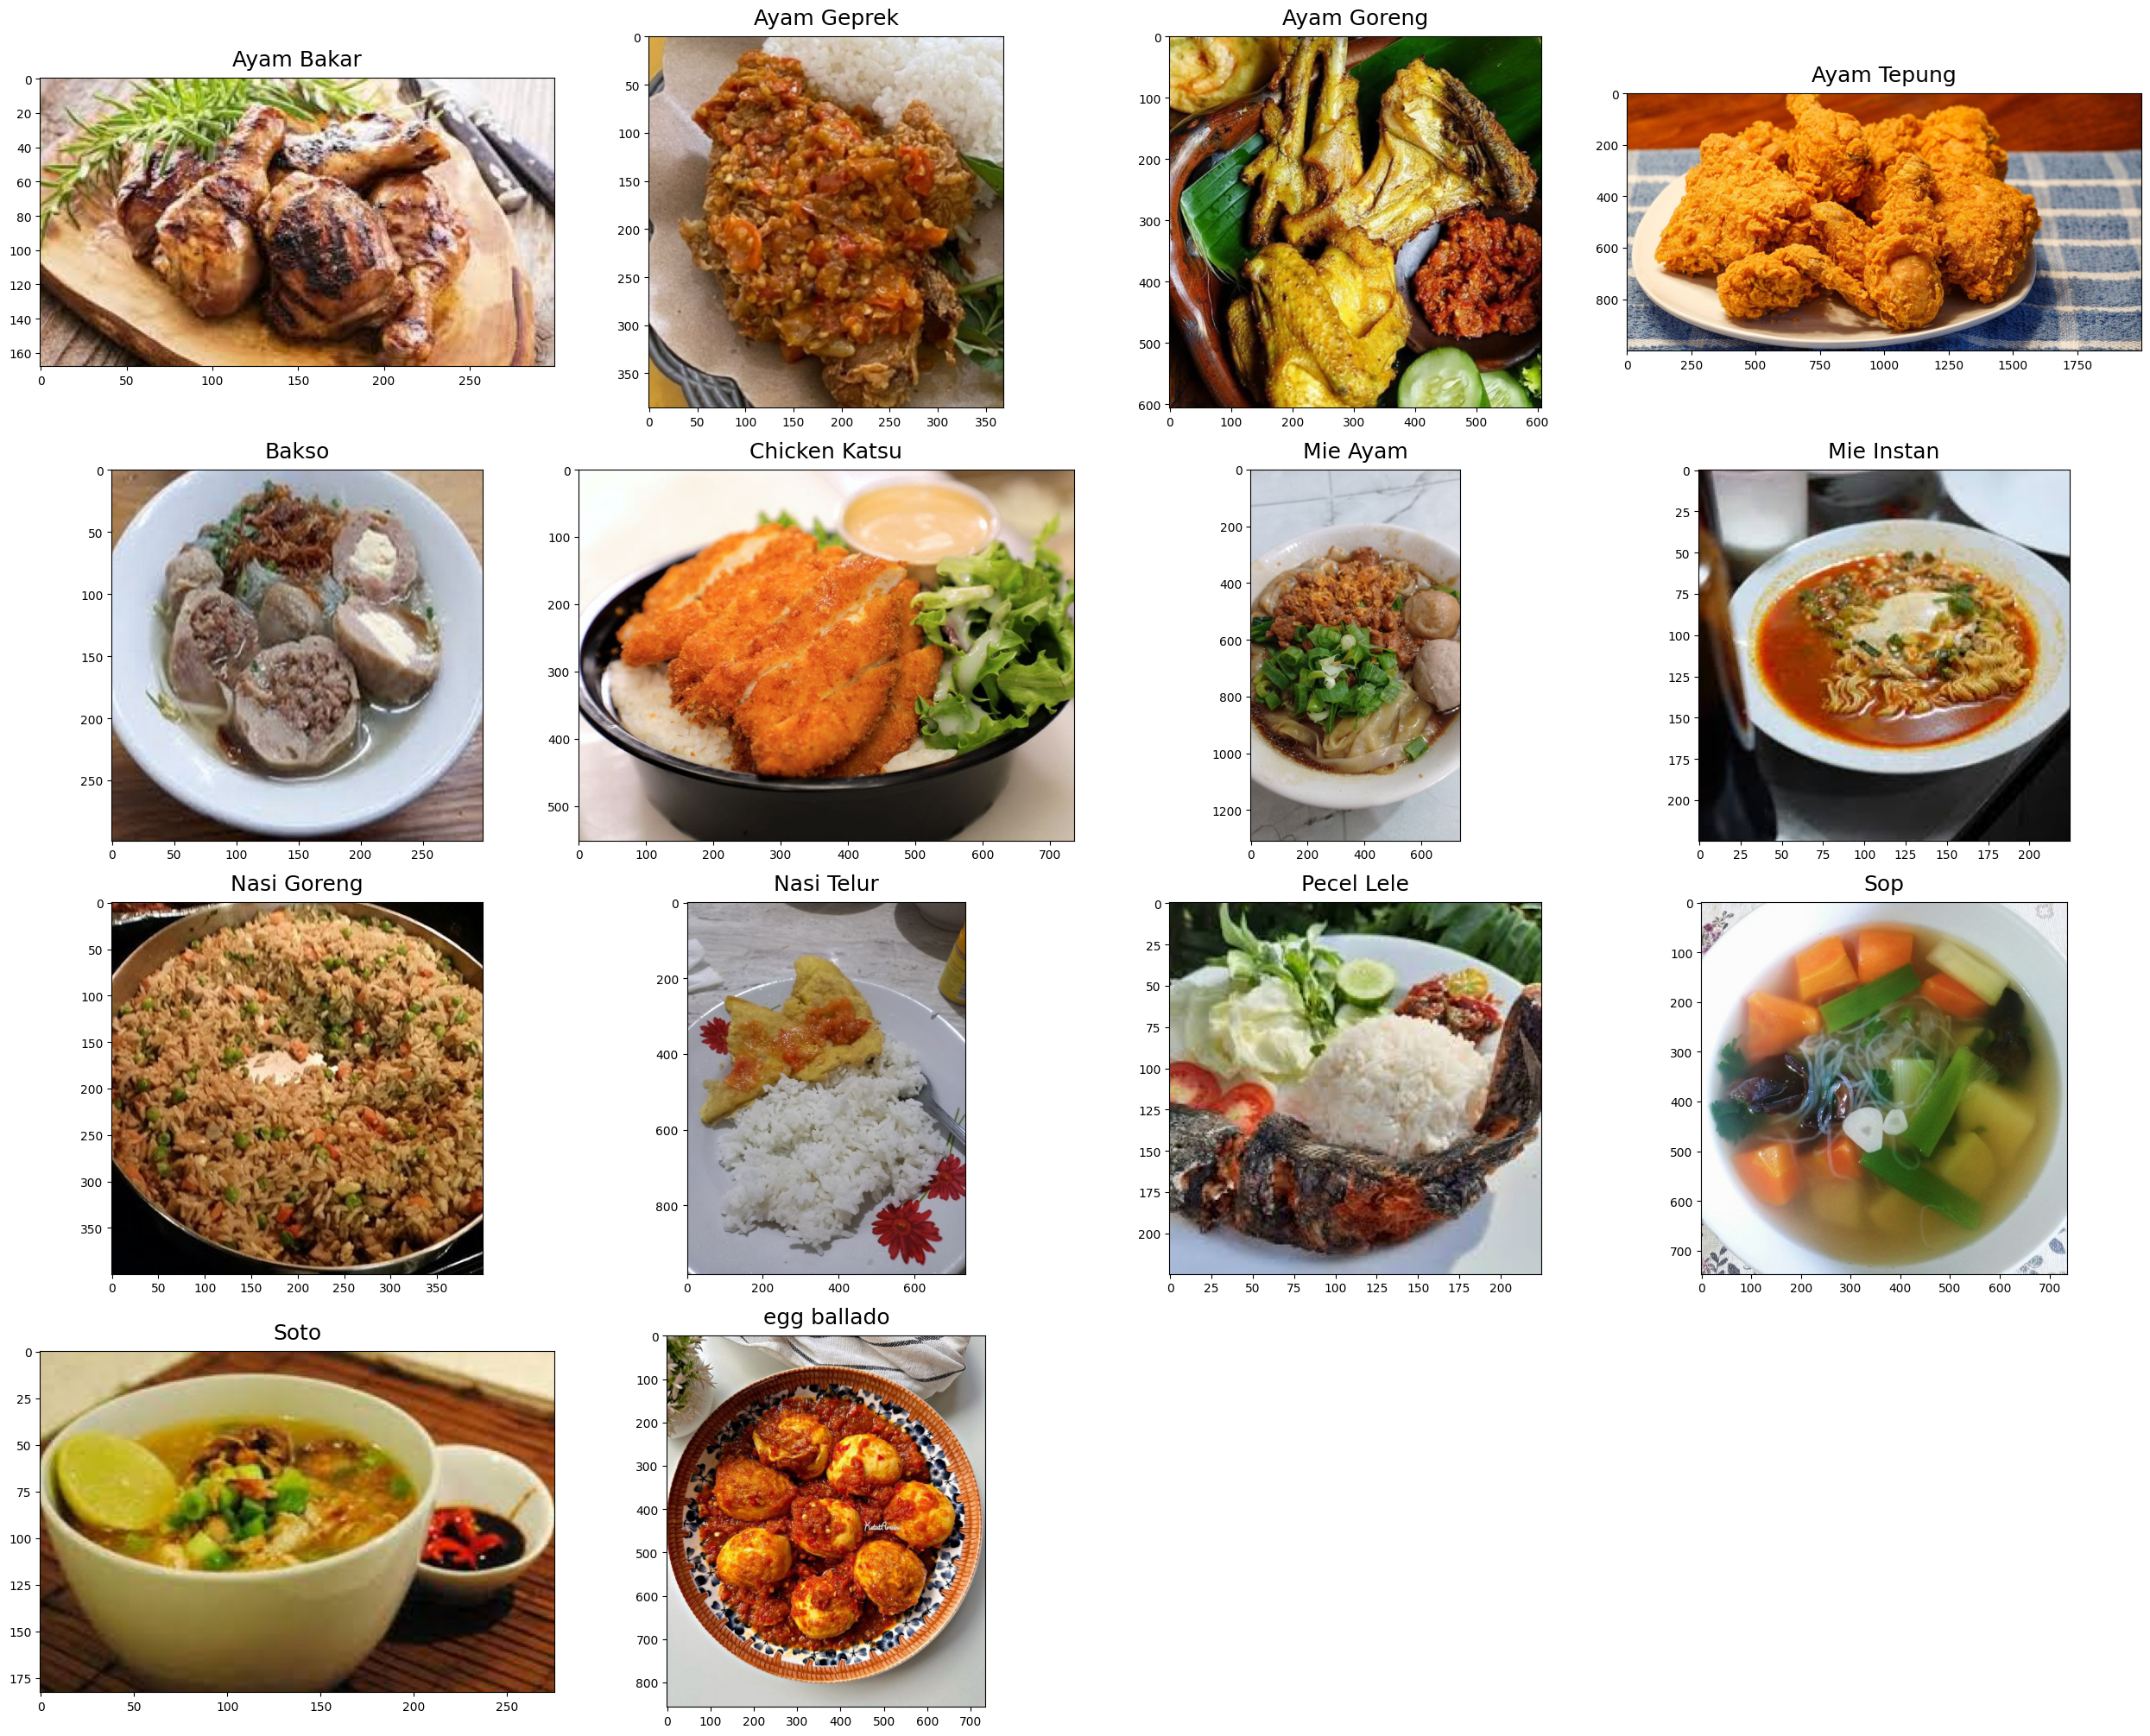

In [3]:
train_dir = "Dataset\Train"
test_dir = "Dataset\Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.4,
                                                                horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical')

Found 2673 images belonging to 14 classes.


Found 872 images belonging to 14 classes.


Pakai MobileNet ngga usah pakai link kaya Inception, langsung dipanggil aja tinggal ganti versionnya aja.

Referensi: https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2/blob/main/Transfer_learning_with_MobileNet_v1-Copy1.md#3

Sumber coursera : https://colab.research.google.com/drive/1gfaEHcPhTgab4emO8FE8f-TxdZ4mTLV8?authuser=1 (Cuma pakai inception sih)

In [6]:
import tensorflow as tf
# Loading the Pre-trained MobileNet Model
from tensorflow.keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Freezing the Base Layer
for layer in base_model.layers:
    layer.trainable = False

last_layer = base_model.get_layer('conv_dw_8_relu')

base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [7]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='Model/model.weights.keras',
                                                                monitor='val_accuracy',
                                                                mode='max',
                                                                save_best_only=True)

Lanjut masukin model

In [8]:
model1 = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Dense(14, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

model1.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

In [9]:
# AKURASI AWALNYA 0.2 

history_mobileNet=model1.fit(train_generator,
                    validation_data=test_generator,
                    epochs=50, steps_per_epoch=20, verbose=1, validation_steps=5)  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/50


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3016 - loss: 2.6072 - val_accuracy: 0.5100 - val_loss: 1.6830
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5400 - loss: 1.3981 - val_accuracy: 0.6600 - val_loss: 1.2045
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6171 - loss: 1.1791 - val_accuracy: 0.6400 - val_loss: 1.1502
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7050 - loss: 0.9352 - val_accuracy: 0.7000 - val_loss: 1.0270
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7133 - loss: 0.8335 - val_accuracy: 0.6900 - val_loss: 1.2677
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7122 - loss: 0.9083 - val_accuracy: 0.6800 - val_loss: 1.0589
Epoch 7/50
14/20 ━━━━━━━━━━━━━━━━━━━━ 4s 748ms/step - accuracy: 0.8027 - loss: 0.6807

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 666ms/step - accuracy: 0.7987 - loss: 0.6621 - val_accuracy: 0.7100 - val_loss: 0.8934
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8085 - loss: 0.6111 - val_accuracy: 0.6500 - val_loss: 1.3798
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 938ms/step - accuracy: 0.7942 - loss: 0.6593 - val_accuracy: 0.6528 - val_loss: 1.1319
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7800 - loss: 0.6982 - val_accuracy: 0.7700 - val_loss: 0.8535
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7794 - loss: 0.6971 - val_accuracy: 0.6900 - val_loss: 1.0686
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 949ms/step - accuracy: 0.7560 - loss: 0.6664 - val_accuracy: 0.7200 - val_loss: 0.8556
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8091 - loss: 0.5382 - val_accuracy: 0.7800 - val_loss: 0.6307
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 668ms/step - accuracy: 0.7619 - loss: 0.6308 - val_accuracy: 0.7300 - val

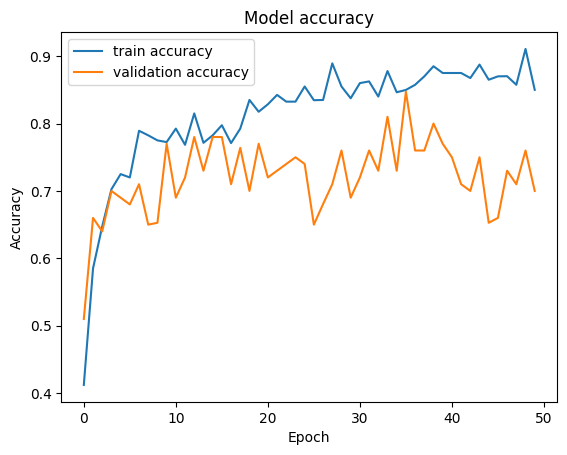

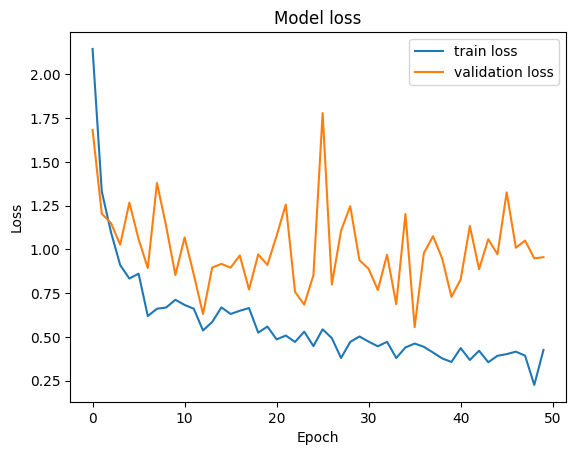

In [10]:
def plot_accuracy(history):
    plt.plot(history_mobileNet.history['accuracy'],label='train accuracy')
    plt.plot(history_mobileNet.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):
    plt.plot(history_mobileNet.history['loss'],label="train loss")
    plt.plot(history_mobileNet.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history_mobileNet)
plot_loss(history_mobileNet)

Inception

In [11]:
import tensorflow as tf
# Loading the Pre-trained MobileNet Model
from tensorflow.keras.applications import InceptionV3
base_model_i = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Freezing the Base Layer
for layer in base_model_i.layers:
    layer.trainable = False

# last_layer = base_model_i.get_layer('conv_dw_8_relu')

base_model_i.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

https://www.kaggle.com/code/mehrdadsadeghi/fashionmnist-cnn-with-tensorflow-confusionmatrix

In [12]:
model2 = tf.keras.models.Sequential([
  base_model_i,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Dense(14, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

In [13]:
# AKURASI AWALNYA 0.2 

history_inceptionV3=model2.fit(train_generator,
                    validation_data=test_generator,
                    epochs=30, steps_per_epoch=20, verbose=1, validation_steps=5)  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.2893 - loss: 2.4181 - val_accuracy: 0.3300 - val_loss: 6.4307
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.5523 - loss: 1.3945 - val_accuracy: 0.6000 - val_loss: 1.2676
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.6444 - loss: 1.0817 - val_accuracy: 0.2300 - val_loss: 7.6129
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.7046 - loss: 0.9214 - val_accuracy: 0.6300 - val_loss: 1.2429
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.6019 - loss: 1.2782 - val_accuracy: 0.6600 - val_loss: 1.0272
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.6918 - loss: 1.0755 - val_accuracy: 0.2700 - val_loss: 3.4630
Epoch 7/30
14/20 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6833 - loss: 1.0535

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6980 - loss: 1.0066 - val_accuracy: 0.5900 - val_loss: 1.2893
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.6954 - loss: 0.9093 - val_accuracy: 0.5400 - val_loss: 1.6242
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.6725 - loss: 1.0216 - val_accuracy: 0.6667 - val_loss: 0.9316
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.7126 - loss: 0.9261 - val_accuracy: 0.6300 - val_loss: 1.0812
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.6675 - loss: 0.9901 - val_accuracy: 0.6000 - val_loss: 1.1722
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.6864 - loss: 1.0025 - val_accuracy: 0.6200 - val_loss: 1.0973
Epoch 13/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.7311 - loss: 0.9229 - val_accuracy: 0.3600 - val_loss: 4.1278
Epoch 14/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7471 - loss: 0.8579 - val_accuracy: 0.6900 - val_loss: 0.930

KeyboardInterrupt: 

In [ ]:
def plot_accuracy(history):
    plt.plot(history_inceptionV3.history['accuracy'],label='train accuracy')
    plt.plot(history_inceptionV3.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):
    plt.plot(history_inceptionV3.history['loss'],label="train loss")
    plt.plot(history_inceptionV3.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history_inceptionV3)
plot_loss(history_inceptionV3)